## The notebook which was gone 

### Hopefully it will stay in repository now

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import xarray as xr
import cartopy.crs as ccrs
import plot_func as f
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
path = '/Users/johannemehren/filer/'

ds= xr.open_dataset(path + 'era5_latlon_2006-2018_3030.nc')
ds_regrid = xr.open_dataset(path + 'gridfile_test.nc')

ds1_regrid = xr.open_dataset(path + 'erai_regrid_5x5.nc')
obs = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')
obs_res = obs.sel(time=slice('2007-12-01', '2018-11-30')).resample(time='M').mean()

In [4]:
erai_res = ds1_regrid.sel(time=slice('2007-12-01', '2018-11-30'))
era5_res = ds_regrid.sel(time=slice('2007-12-01', '2018-11-30'))

In [5]:
era5_m = era5_res.groupby('time.season').mean()
erai_m = erai_res.groupby('time.season').mean()
obs_m = obs_res.groupby('time.season').mean()

/Users/johannemehren/opt/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [7]:
era5_nino1 = era5_res.sel(time=slice('2009-12-01', '2010-02-28'))
era5_nino2 = era5_res.sel(time=slice('2014-12-01', '2015-02-28'))
era5_nino3 = era5_res.sel(time=slice('2015-12-01', '2016-02-28'))

era5_nino = xr.concat([era5_nino1, era5_nino2, era5_nino3], dim='new')

era5_nina1 = era5_res.sel(time=slice('2007-12-01', '2008-02-28'))
era5_nina2 = era5_res.sel(time=slice('2008-12-01', '2009-02-28'))
era5_nina3 = era5_res.sel(time=slice('2011-12-01', '2012-02-28'))

era5_nina = xr.concat([era5_nina1, era5_nina2, era5_nina3], dim='new')


In [8]:
era5_nino1 = obs_res.sel(time=slice('2009-12-01', '2010-02-28'))
era5_nino2 = obs_res.sel(time=slice('2014-12-01', '2015-02-28'))
era5_nino3 = obs_res.sel(time=slice('2015-12-01', '2016-02-29'))


In [9]:
def enso_select(ds, obs=False):
    
    if obs == True:
        
        nino1 = ds.sel(time=slice('2009-12-01', '2010-03-01'))
        nino2 = ds.sel(time=slice('2014-12-01', '2015-03-01'))
        nino3 = ds.sel(time=slice('2015-12-01', '2016-03-01'))
        
        nino = xr.concat([nino1, nino2, nino3], dim='time')

        nina1 = ds.sel(time=slice('2007-12-01', '2008-03-01'))
        nina2 = ds.sel(time=slice('2008-12-01', '2009-03-01'))
        nina3 = ds.sel(time=slice('2010-12-01', '2011-03-01'))
        nina4 = ds.sel(time=slice('2011-12-01', '2012-03-01'))
        nina5 = ds.sel(time=slice('2017-12-01', '2018-03-01'))
        
        nina = xr.concat([nina1, nina2, nina3, nina4, nina5], dim='time')
        
    
    else: 
        nino1 = ds.sel(time=slice('2009-12-01', '2010-02-28'))
        nino2 = ds.sel(time=slice('2014-12-01', '2015-02-28'))
        nino3 = ds.sel(time=slice('2015-12-01', '2016-02-28'))
        
        nino = xr.concat([nino1, nino2, nino3], dim='time')
        

        nina1 = ds.sel(time=slice('2007-12-01', '2008-02-28'))
        nina2 = ds.sel(time=slice('2008-12-01', '2009-02-28'))
        nina3 = ds.sel(time=slice('2010-12-01', '2011-02-28'))
        nina4 = ds.sel(time=slice('2011-12-01', '2012-02-28'))
        nina5 = ds.sel(time=slice('2017-12-01', '2018-02-28'))

        nina = xr.concat([nina1, nina2, nina3, nina4, nina5], dim='time')
        
    return nino, nina
        
    

In [10]:
era5_nino, era5_nina = enso_select(era5_res)

In [11]:
erai_nino, erai_nina = enso_select(erai_res)


In [12]:
obs_nino, obs_nina = enso_select(obs_res, obs=True)

In [13]:
nino_diff_era5 = era5_nino.ctpt.mean(axis=0) - obs_nino.CP_T.mean(axis=0)
nino_diff_erai = erai_nino.ctpt.mean(axis=0) - obs_nino.CP_T.mean(axis=0)

nino_diff_era5_z = era5_nino.ctpz.mean(axis=0) - obs_nino.CP_z.mean(axis=0)
nino_diff_erai_z = erai_nino.ctpz.mean(axis=0) - obs_nino.CP_z.mean(axis=0)

nina_diff_era5 = era5_nina.ctpt.mean(axis=0) - obs_nina.CP_T.mean(axis = 0)
nina_diff_erai = erai_nina.ctpt.mean(axis=0) - obs_nina.CP_T.mean(axis=0)

nina_diff_era5_z = era5_nina.ctpz.mean(axis=0) - obs_nina.CP_z.mean(axis = 0)
nina_diff_erai_z = erai_nina.ctpz.mean(axis=0) - obs_nina.CP_z.mean(axis=0)

In [14]:
nino_diff_era5_lrt = era5_nino.tpt.mean(axis=0) - obs_nino.LR_T.mean(axis=0)
nino_diff_erai_lrt = erai_nino.tpt.mean(axis=0) - obs_nino.LR_T.mean(axis=0)

nino_diff_era5_lrz = era5_nino.tpz.mean(axis=0) - obs_nino.LR_z.mean(axis=0)
nino_diff_erai_lrz = erai_nino.tpz.mean(axis=0) - obs_nino.LR_z.mean(axis=0)

nina_diff_era5_lrt = era5_nina.tpt.mean(axis=0) - obs_nina.LR_T.mean(axis = 0)
nina_diff_erai_lrt = erai_nina.tpt.mean(axis=0) - obs_nina.LR_T.mean(axis=0)

nina_diff_era5_lrz = era5_nina.tpz.mean(axis=0) - obs_nina.LR_z.mean(axis = 0)
nina_diff_erai_lrz = erai_nina.tpz.mean(axis=0) - obs_nina.LR_z.mean(axis=0)

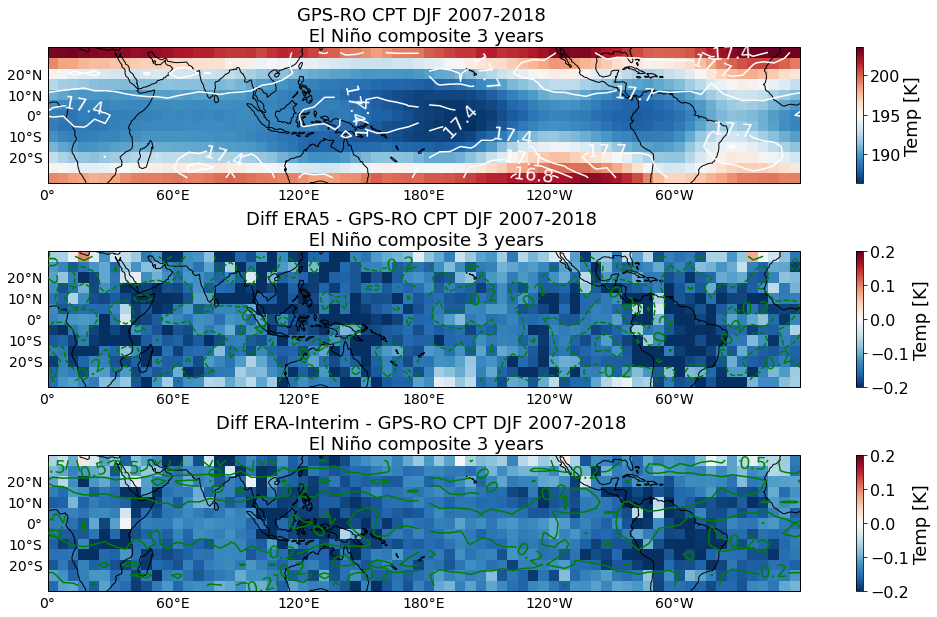

In [48]:
tl1 = 'GPS-RO CPT DJF 2007-2018 \n El Niño composite 3 years'
tl2 = 'Diff ERA5 - GPS-RO CPT DJF 2007-2018 \n El Niño composite 3 years'
tl3 = 'Diff ERA-Interim - GPS-RO CPT DJF 2007-2018 \n El Niño composite 3 years'

l = f.enso_contour(obs_nino.CP_T.mean(axis=0), obs_nino.CP_z.mean(axis=0), tl1, 
                   nino_diff_era5_z, nino_diff_era5_z, tl2, 
                   d11, d1, tl3, vmin = -0.2, vmax = 0.2, label='Temp [K]' )
#l.savefig('figs/gpsro_abs_gpsro-era5_cpt_el_djf.png')

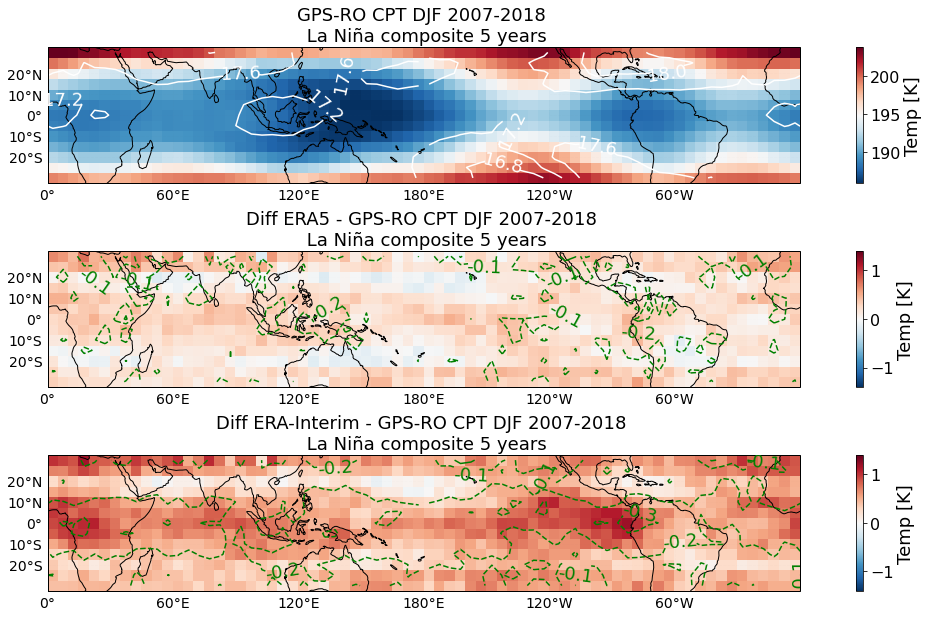

In [15]:
tl1 = 'GPS-RO CPT DJF 2007-2018 \n La Niña composite 5 years'
tl2 = 'Diff ERA5 - GPS-RO CPT DJF 2007-2018 \n La Niña composite 5 years'
tl3 = 'Diff ERA-Interim - GPS-RO CPT DJF 2007-2018 \n La Niña composite 5 years'

l2 = f.enso_contour(obs_nina.CP_T.mean(axis=0), obs_nina.CP_z.mean(axis=0), tl1, 
                   nina_diff_era5, nina_diff_era5_z, tl2, 
                   nina_diff_erai, nina_diff_erai_z, tl3, vmin = -1.4, vmax = 1.4, label='Temp [K]' )
#l2.savefig('figs/gpsro_abs_gpsro-era5_cpt_la_djf.png')

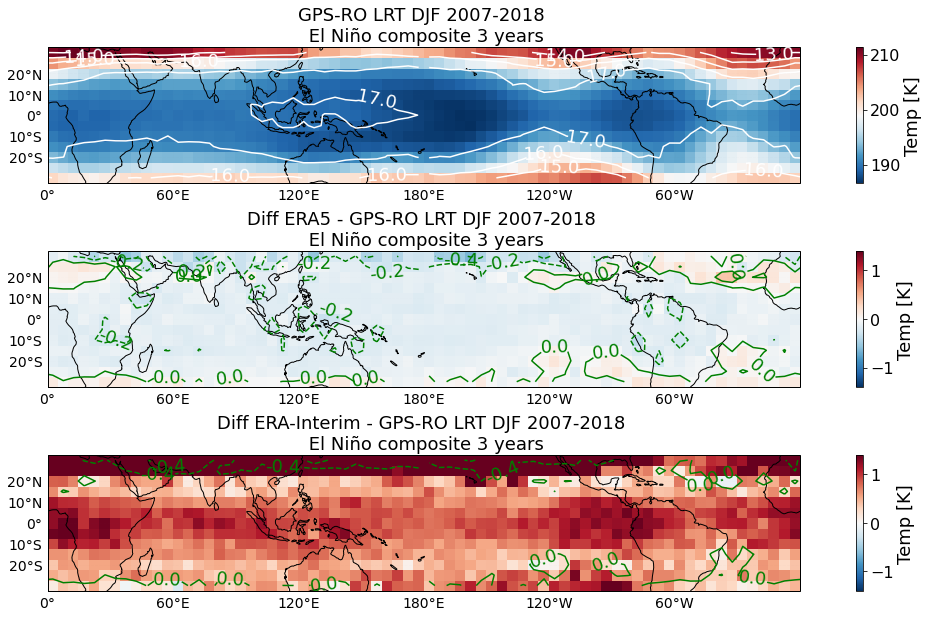

In [46]:

tl1 = 'GPS-RO LRT DJF 2007-2018 \n El Niño composite 3 years'
tl2 = 'Diff ERA5 - GPS-RO LRT DJF 2007-2018 \n El Niño composite 3 years'
tl3 = 'Diff ERA-Interim - GPS-RO LRT DJF 2007-2018 \n El Niño composite 3 years'
l3 = f.enso_contour(obs_nino.LR_T.mean(axis=0), obs_nino.LR_z.mean(axis=0), tl1, 
                   nino_diff_era5_lrz, nino_diff_era5_lrz, tl2, 
                   nino_diff_erai_lrt, nino_diff_erai_lrz, tl3, vmin = -1.4, vmax = 1.4, label='Temp [K]' )
#l3.savefig('figs/gpsro_abs_gpsro-era5-erai_lrt_el_djf.png')

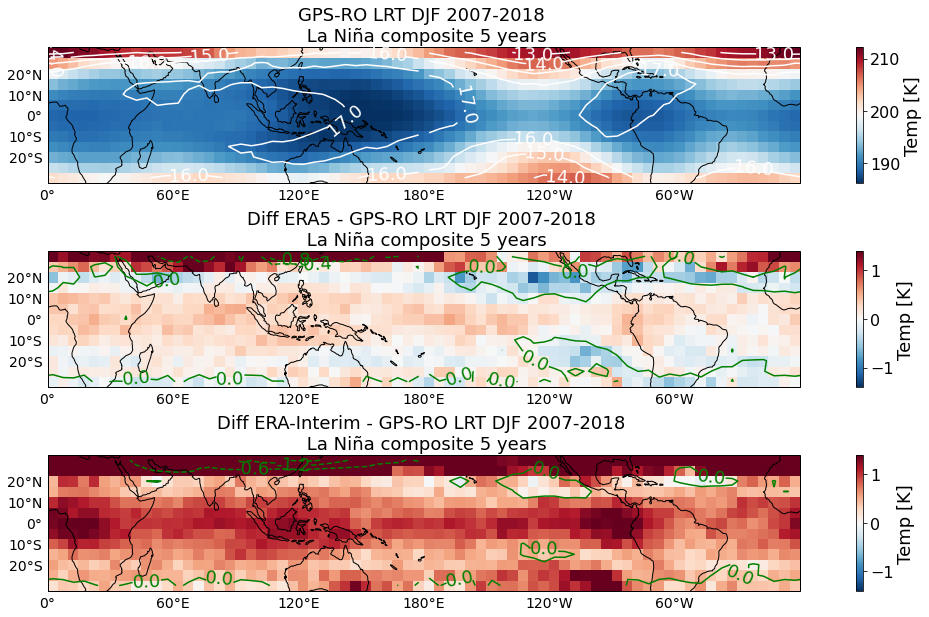

In [42]:
tl1 = 'GPS-RO LRT DJF 2007-2018 \n La Niña composite 5 years'
tl2 = 'Diff ERA5 - GPS-RO LRT DJF 2007-2018 \n La Niña composite 5 years'
tl3 = 'Diff ERA-Interim - GPS-RO LRT DJF 2007-2018 \n La Niña composite 5 years'
l4 = f.enso_contour(obs_nina.LR_T.mean(axis=0), obs_nina.LR_z.mean(axis=0), tl1, 
                   nina_diff_era5_lrt, nina_diff_era5_lrz, tl2, 
                   nina_diff_erai_lrt, nina_diff_erai_lrz, tl3, vmin = -1.4, vmax = 1.4, label='Temp [K]' )
#l4.savefig('figs/gpsro_abs_gpsro-era5-erai_lrt_la_djf.png')

In [40]:
d2.max()

<xarray.DataArray ()>
array(1.0756226, dtype=float32)
Coordinates:
    season   <U3 'DJF'

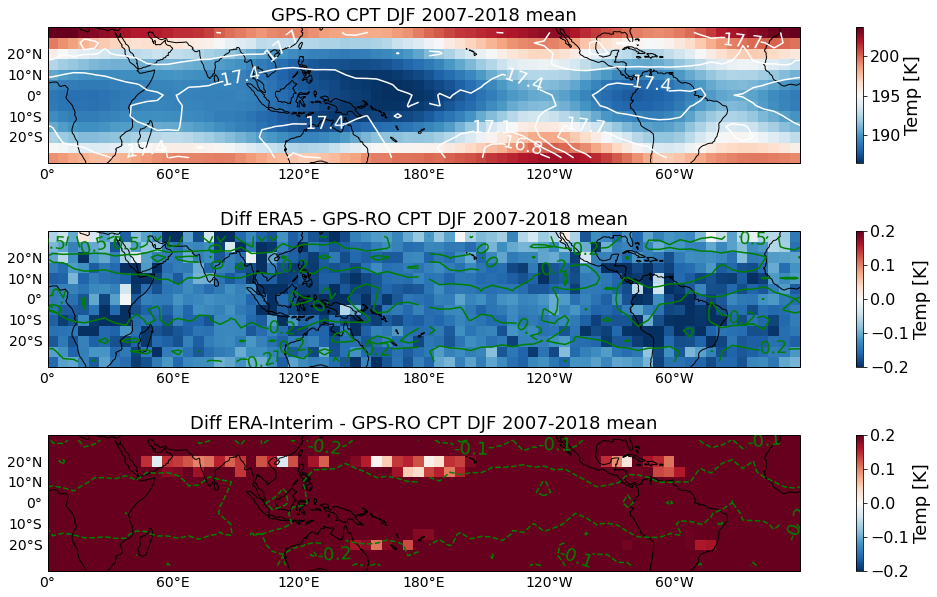

In [45]:
d1 = era5_m.ctpt[0,:,:]- obs_m.CP_T[0,:,:] 
d11 = era5_m.ctpz[0,:,:] - obs_m.CP_z[0,:,:] 

d2 = erai_m.ctpt[0,:,:] - obs_m.CP_T[0,:,:] 
d22 =  erai_m.ctpz[0,:,:] -  obs_m.CP_z[0,:,:]

tl1 = 'GPS-RO CPT DJF 2007-2018 mean'
tl2 = 'Diff ERA5 - GPS-RO CPT DJF 2007-2018 mean'
tl3 = 'Diff ERA-Interim - GPS-RO CPT DJF 2007-2018 mean'
l4 = f.enso_contour(obs_m.CP_T[0,:,:], obs_m.CP_z[0,:,:], tl1, 
                   d11, d1, tl2, d2, d22, tl3,
                   vmin = -0.2, vmax = 0.2, label='Temp [K]' )
#l4.savefig('figs/DJF_mean.png', dpi = 800)

In [ ]:
era5_m = era5_res.groupby('time.season').mean()
erai_m = erai_res.groupby('time.season').mean()
obs_m = obs_res.groupby('time.season').mean()

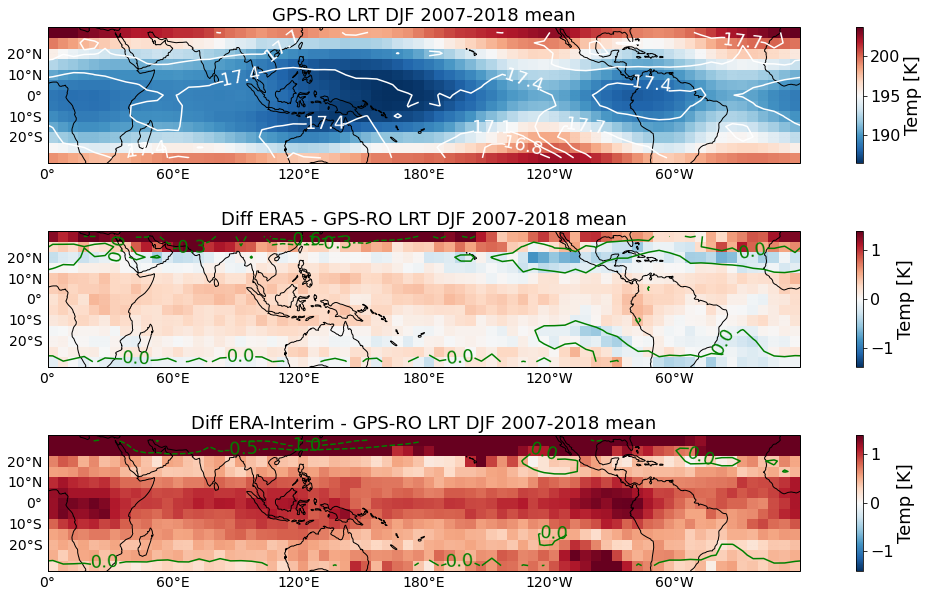

In [44]:
d1 = era5_m.tpt[0,:,:]- obs_m.LR_T[0,:,:] 
d11 = era5_m.tpz[0,:,:] - obs_m.LR_z[0,:,:] 

d2 = erai_m.tpt[0,:,:] - obs_m.LR_T[0,:,:] 
d22 =  erai_m.tpz[0,:,:] -  obs_m.LR_z[0,:,:]

tl1 = 'GPS-RO LRT DJF 2007-2018 mean'
tl2 = 'Diff ERA5 - GPS-RO LRT DJF 2007-2018 mean'
tl3 = 'Diff ERA-Interim - GPS-RO LRT DJF 2007-2018 mean'
l4 = f.enso_contour(obs_m.CP_T[0,:,:], obs_m.CP_z[0,:,:], tl1, 
                   d1, d11, tl2, d2, d22, tl3,
                   vmin = -1.4, vmax = 1.4, label='Temp [K]' )
#l4.savefig('figs/DJF_mean_lrt.png', dpi = 800)